In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/project19Mar/healthcare_cost.csv')

#1. EDA

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(20, 7))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

<ipython-input-7-1e220ff50227>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


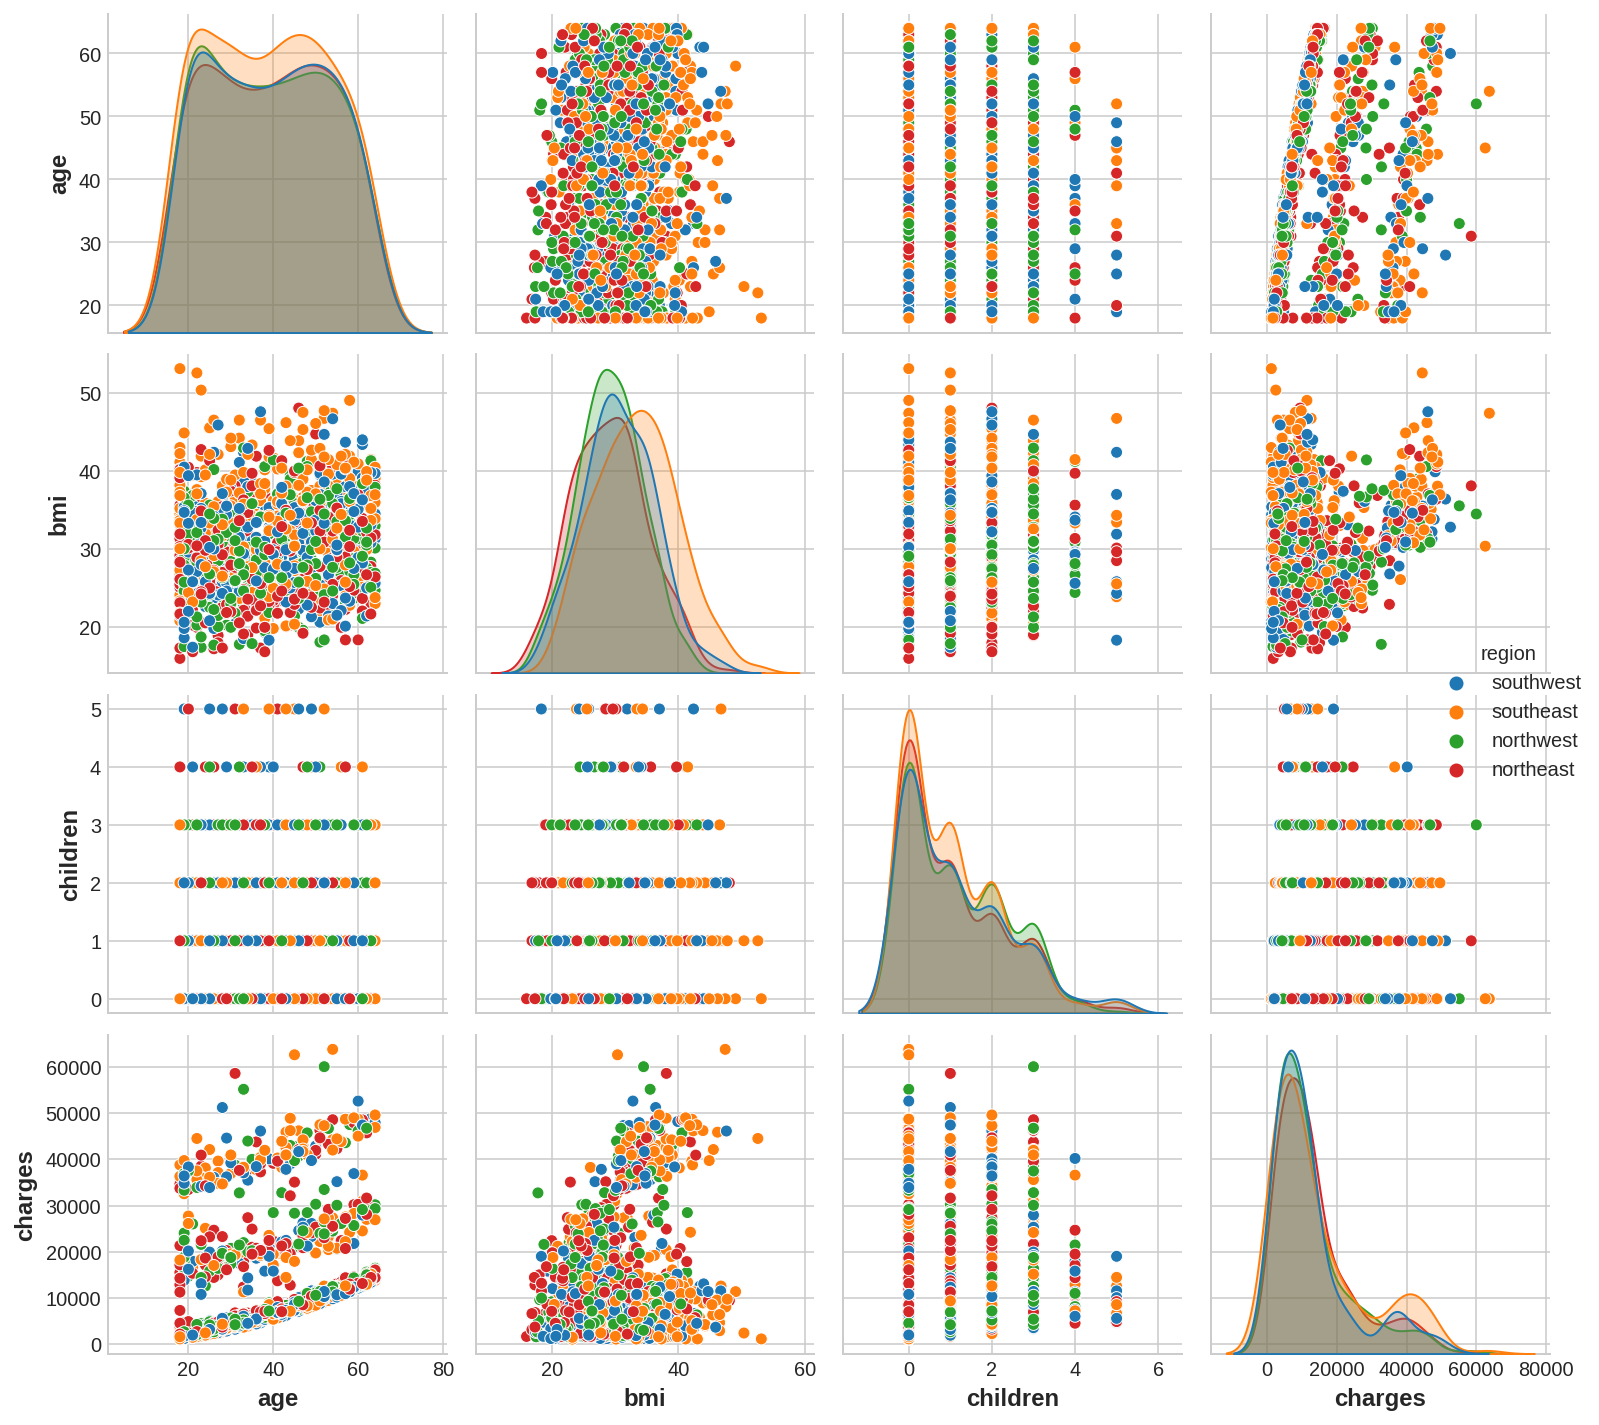

In [ ]:
sns.pairplot(df, hue = 'region')

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

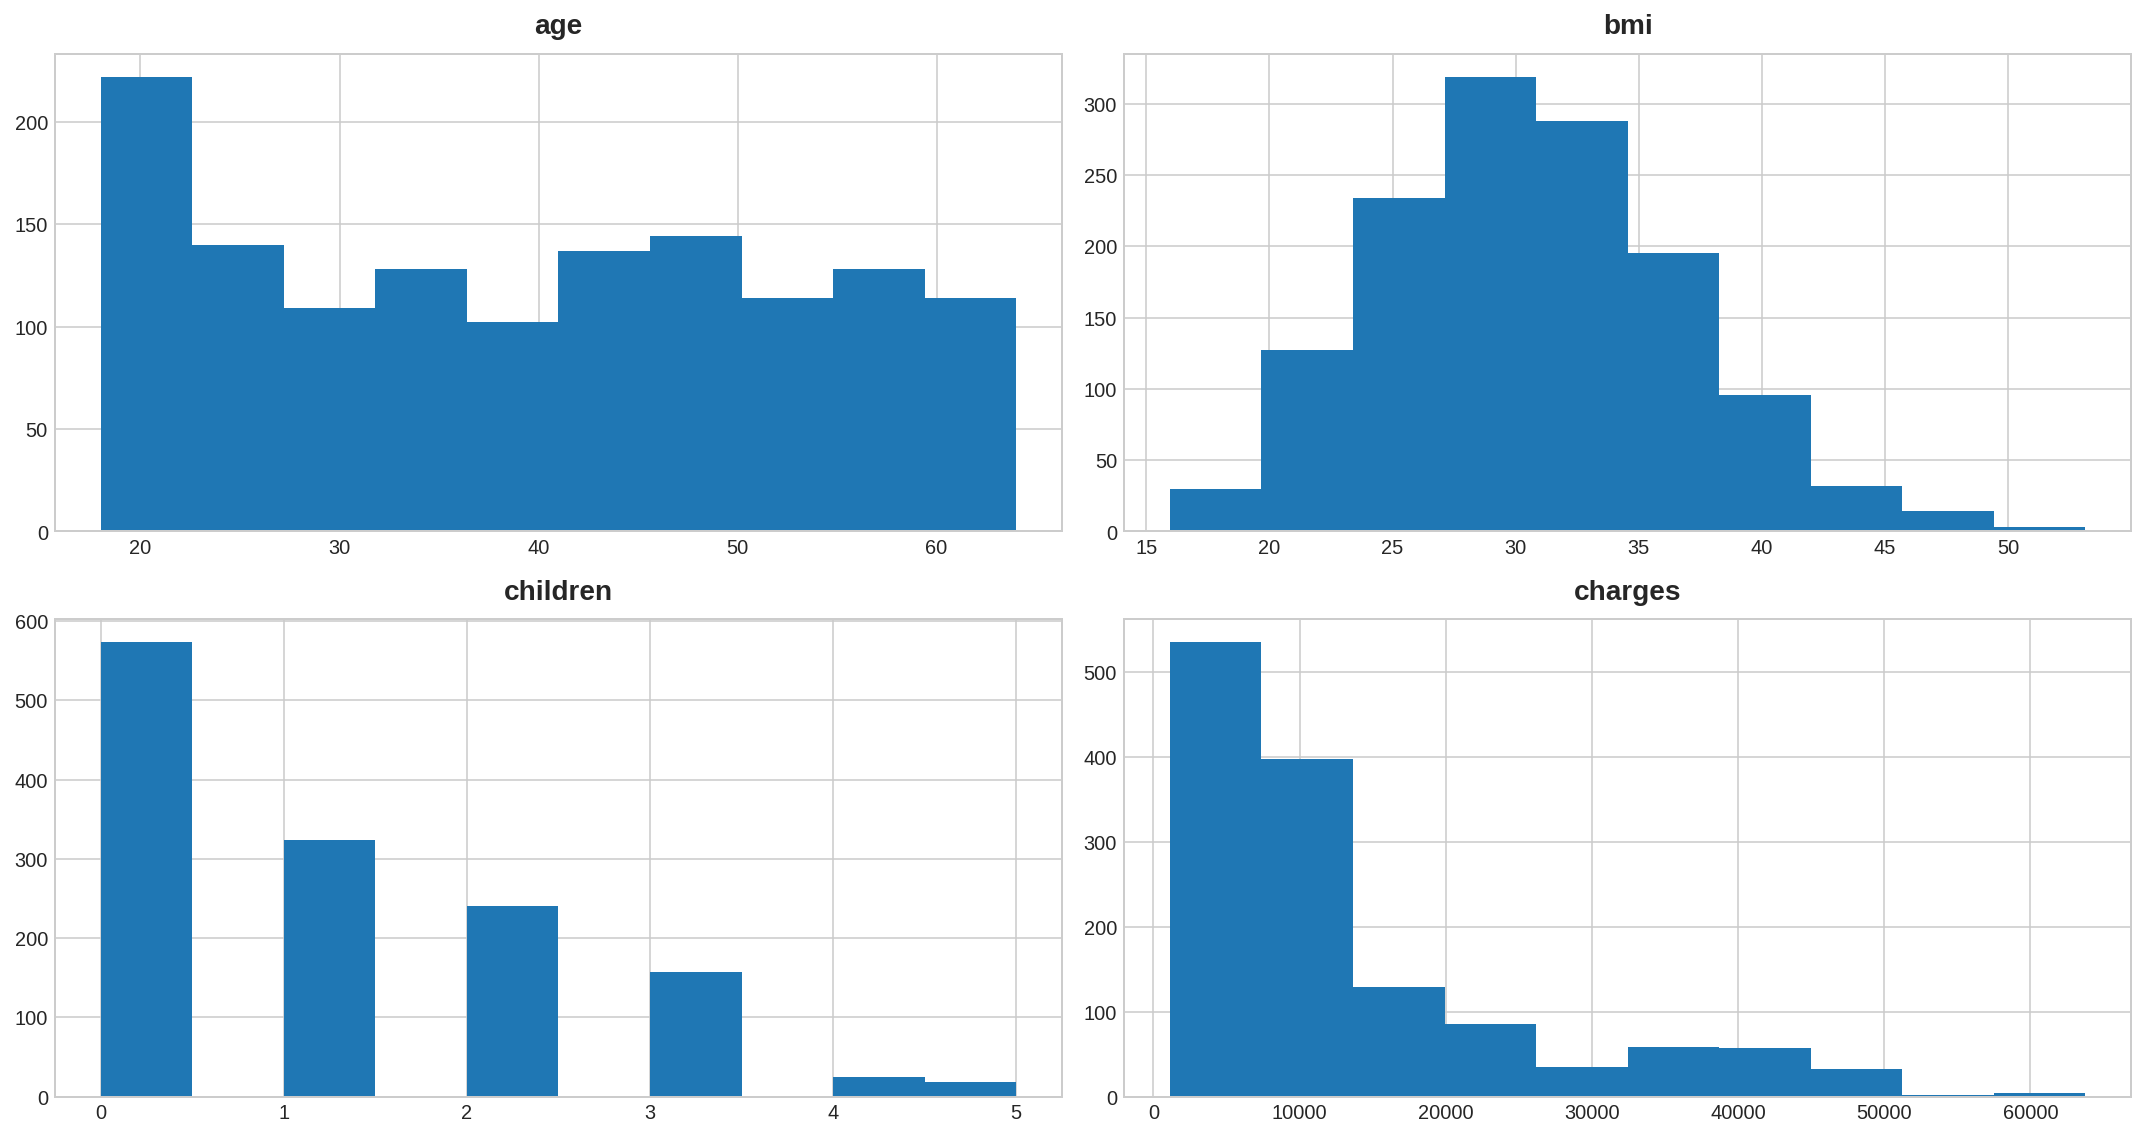

In [ ]:
df.hist(figsize = (15,8))

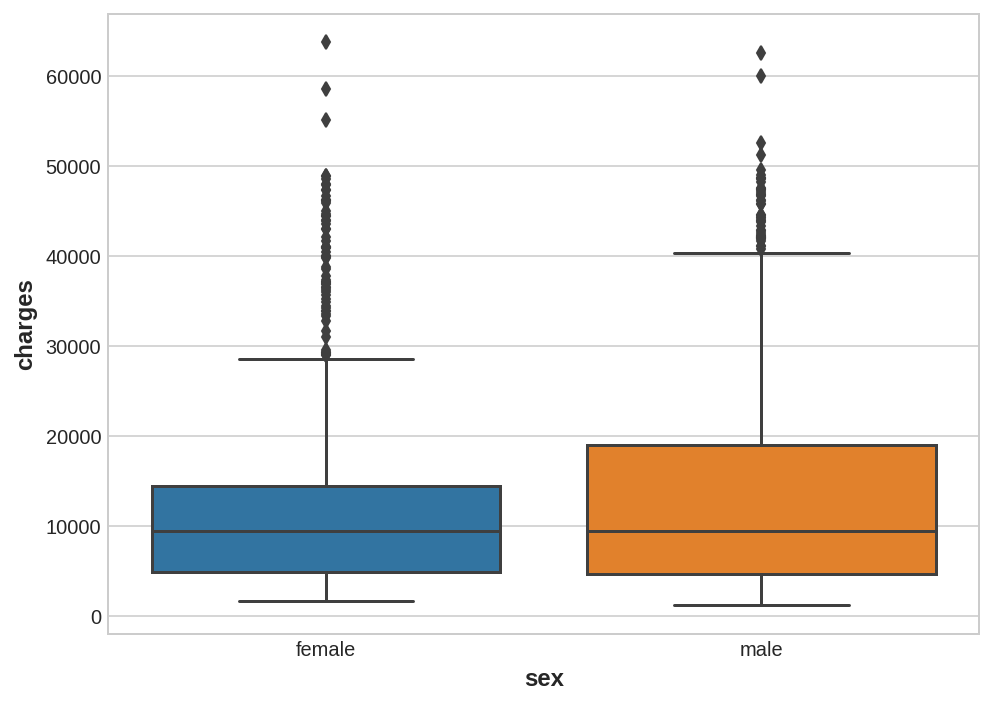

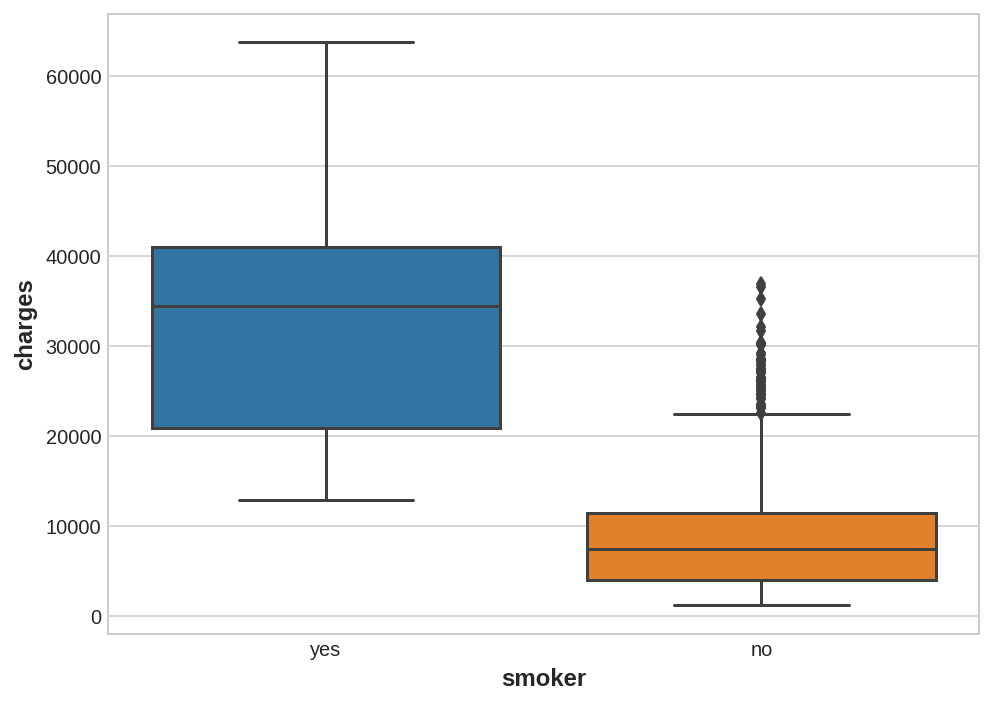

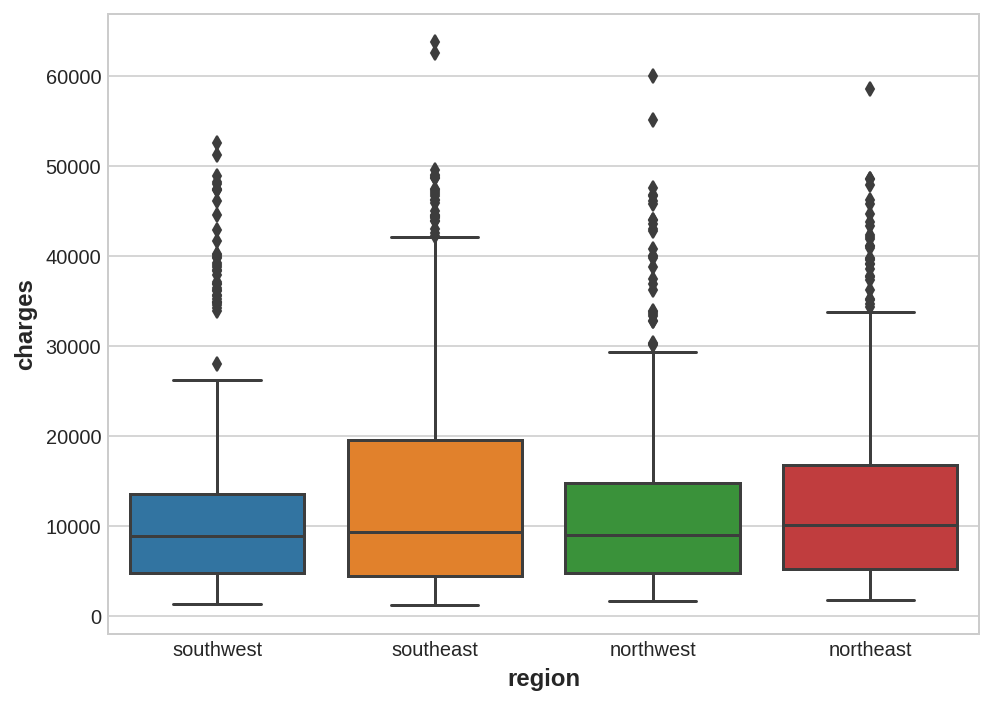

In [ ]:
#plot categorical data
categorical_features = df.dtypes[df.dtypes == object].index
for col in categorical_features:
  fig, ax = plt.subplots(figsize = (7,5))
  sns.boxplot(x = col, y = 'charges',data = df)
  plt.show()

In [ ]:
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

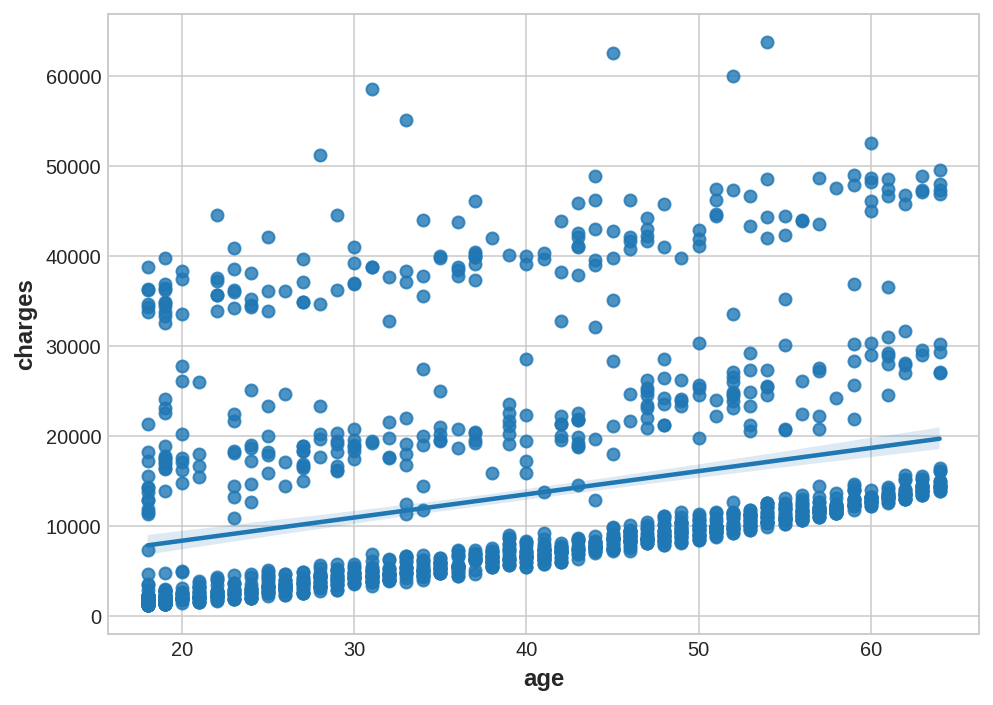

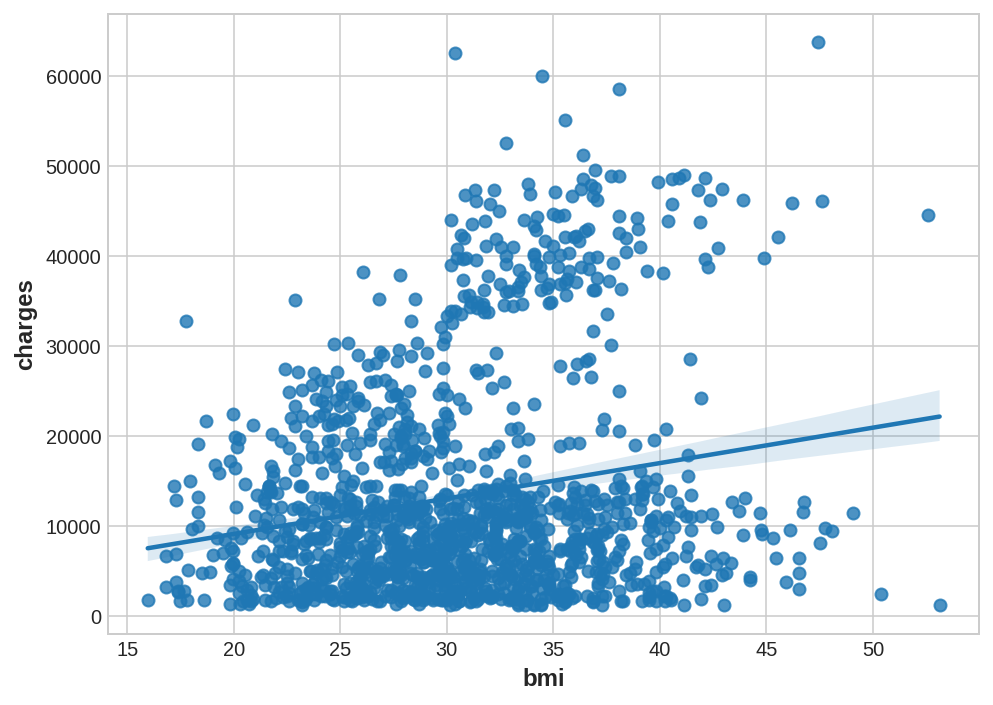

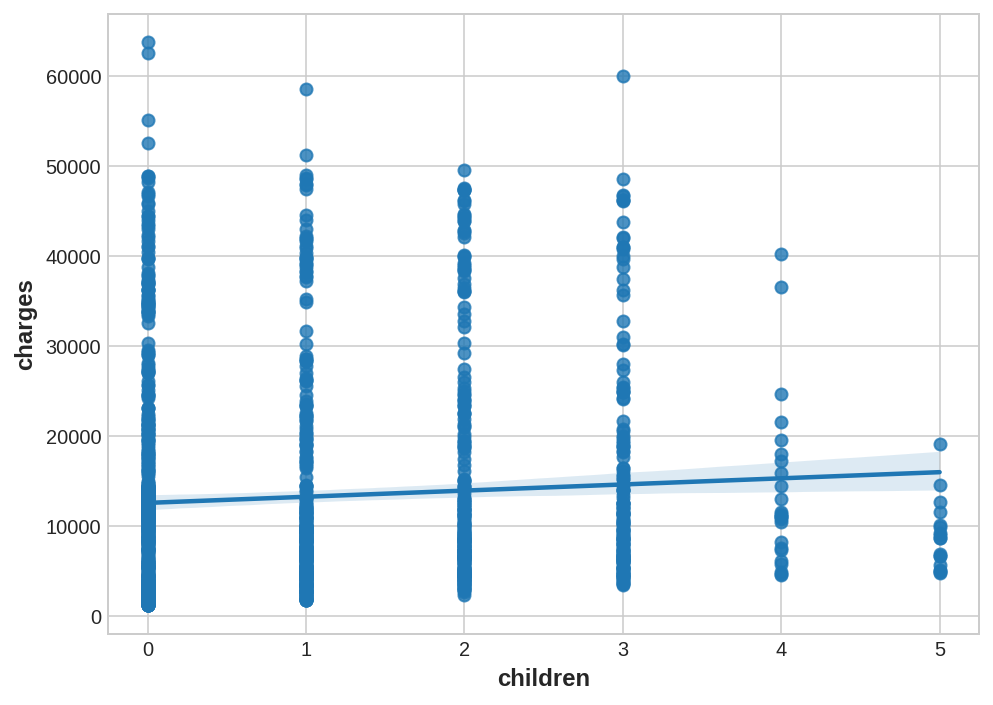

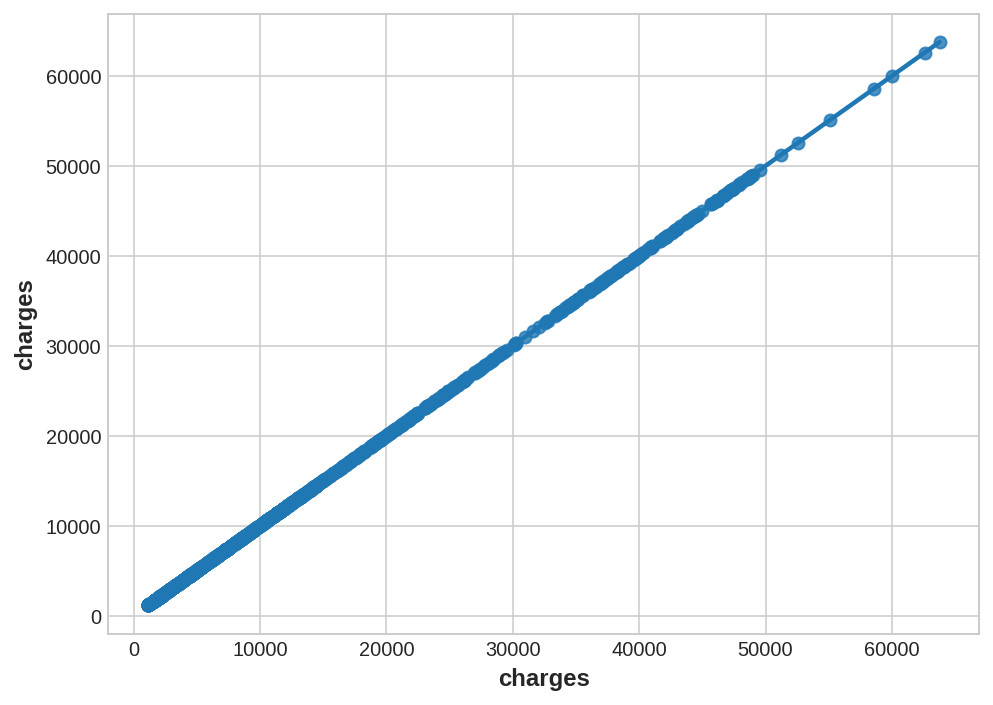

In [ ]:
#plot numerical data
numerical_features = df.dtypes[df.dtypes != object].index
for col in numerical_features:
  fig, ax = plt.subplots(figsize = (7,5))
  sns.regplot(x = col, y = 'charges',data = df)
  plt.show()

<Axes: >

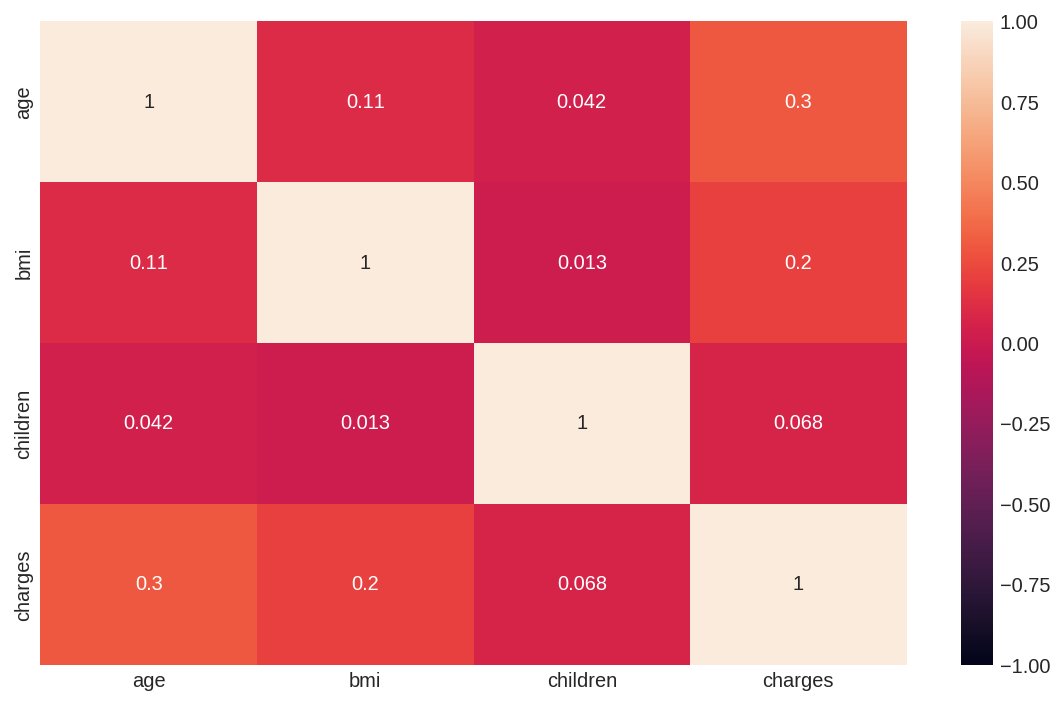

In [ ]:
fig = plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), vmin = -1, vmax = 1,annot=True)

#2. Preprocessing

In [ ]:
df2 = df.copy()

In [ ]:
df2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df2.loc[df2['bmi']< 18.5, 'Weight_Range'] = 'underweight'
df2.loc[(df2['bmi']>=18)&(df2['bmi']<25), 'Weight_Range'] = 'normal'
df2.loc[(df2['bmi']>=25)&(df2['bmi']<30), 'Weight_Range'] = 'overweight'
df2.loc[df2['bmi']>=30, 'Weight_Range'] = 'obese'

In [ ]:
df2.loc[df2['age']< 65, 'Age_Range'] = 'adult'
df2.loc[df2['age']>= 65, 'Age_Range'] = 'elder'

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges,Weight_Range,Age_Range
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,adult
1,18,male,33.770,1,no,southeast,1725.55230,obese,adult
2,28,male,33.000,3,no,southeast,4449.46200,obese,adult
3,33,male,22.705,0,no,northwest,21984.47061,normal,adult
4,32,male,28.880,0,no,northwest,3866.85520,overweight,adult


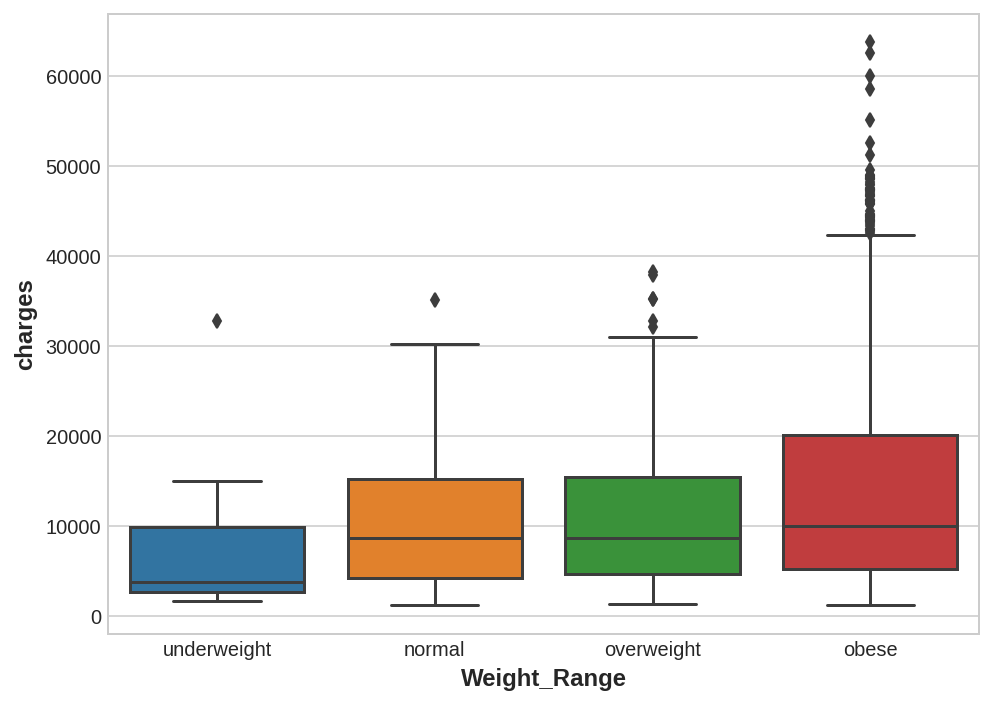

In [ ]:
fig, ax = plt.subplots(figsize = (7,5))
sns.boxplot(x = 'Weight_Range', y = 'charges',data = df2,
            order = ['underweight', 'normal', 'overweight', 'obese'])
plt.show()

In [ ]:
from scipy.stats import norm
import statsmodels.api as sm
from scipy.stats import skew, norm

<ipython-input-24-7ec22a4c43bf>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['charges'], kde = True, hist=True, fit = norm, ax = ax[1])


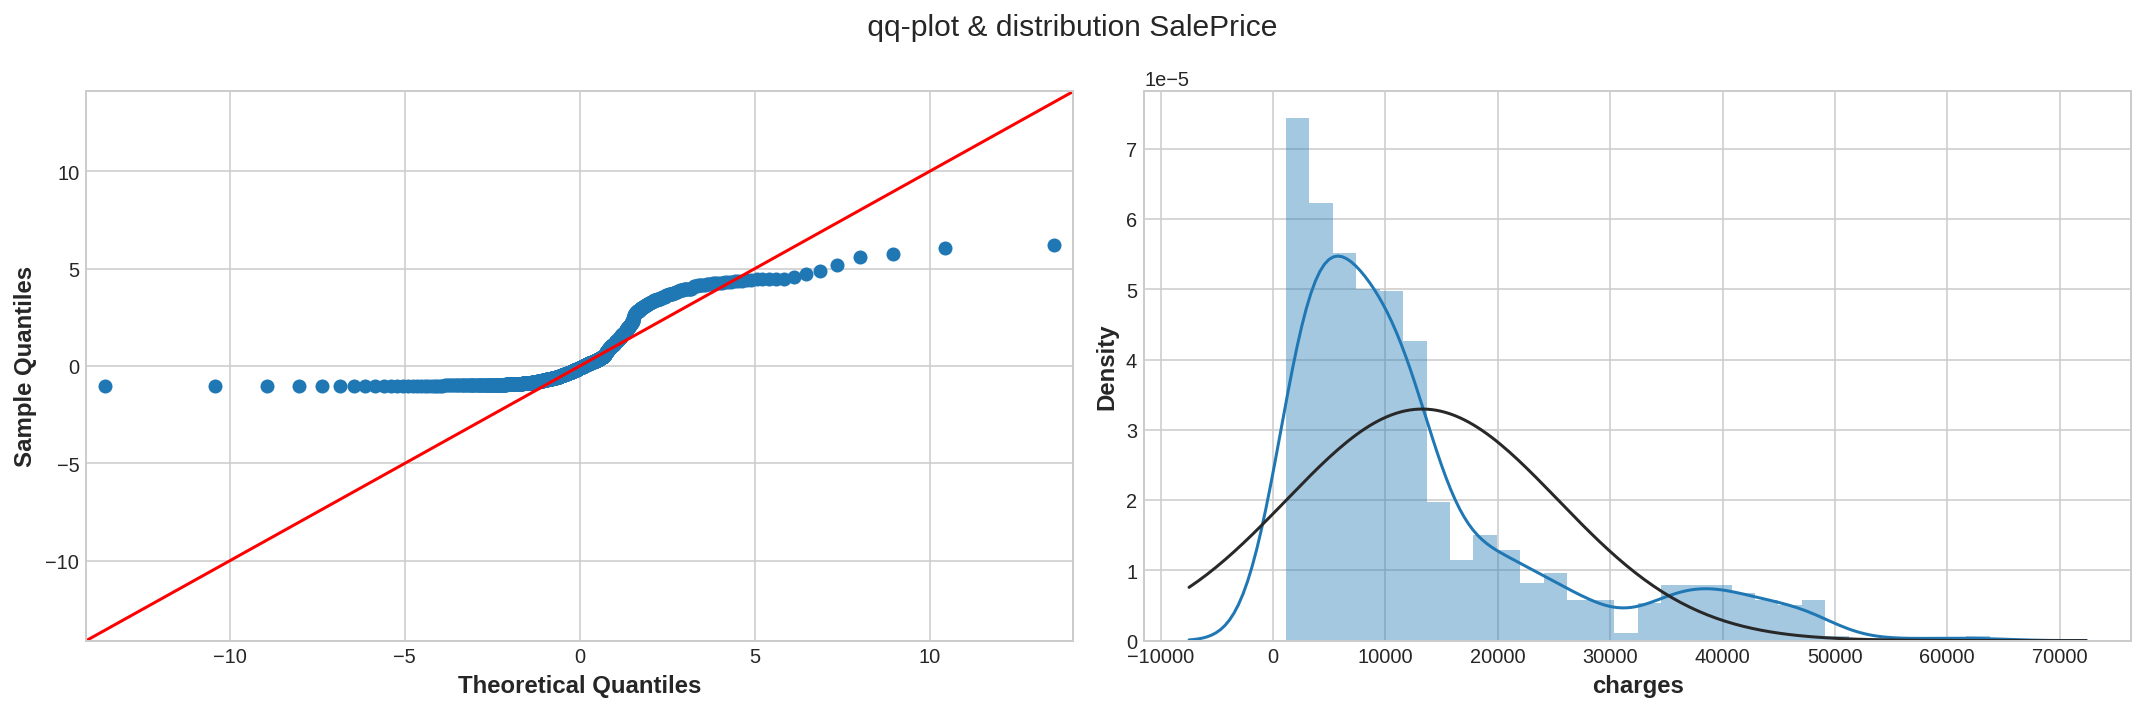

In [ ]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(df2['charges'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(df2['charges'], kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

<ipython-input-25-31f1ccaa9957>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])


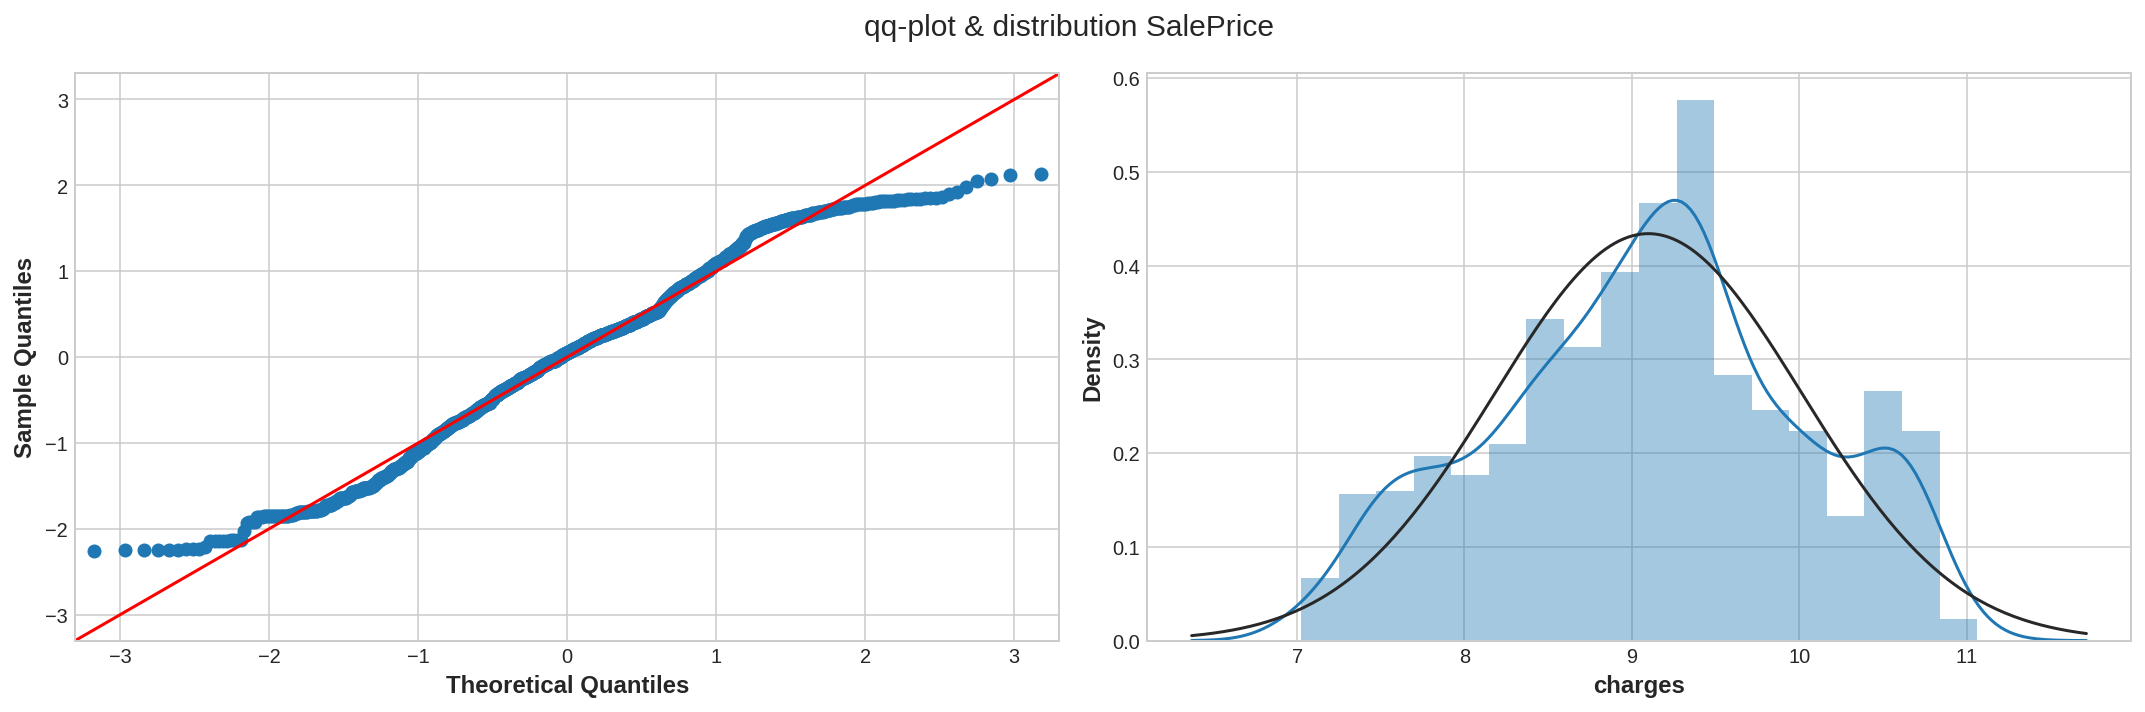

In [ ]:
# take log to change target distribution to normal distribution 

target_log = np.log1p(df2['charges'])

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

In [ ]:
X = df2.drop('charges', axis = 1)
y = target_log

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state= 83)

#3. Modelling

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
num_col = list(X.select_dtypes(include = 'number').columns)
cat_col = list(X.select_dtypes(exclude = 'number').columns)

In [ ]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat', categorical_transformer, cat_col)
    ], remainder="passthrough")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [ ]:
LR = LinearRegression()
SVR = SVR()
RFR = RandomForestRegressor()
GBR = GradientBoostingRegressor()

In [ ]:
LRpipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LR)])

SVRpipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', SVR)])

RFRpipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RFR)])

GBRpipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GBR)])

In [ ]:
from sklearn.model_selection import cross_val_score

models = [LRpipeline, SVRpipeline, RFRpipeline, GBRpipeline]
for i, model in enumerate(models):
  mod = ['LinearRegression', 'SupportVectorRegression', 'RandomForestRegression',
         'GradientboostRegression']
  cvs = cross_val_score(model, X_train, y_train, cv = 5)
  RMSE = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
  print(f'{mod[i]}: mean cross validation (R-squred) = {cvs.mean()*100:.2f}%')
  print(f'RMSE: {RMSE.mean():.4f}')


LinearRegression: mean cross validation (R-squred) = 75.47%
RMSE: 0.4482
SupportVectorRegression: mean cross validation (R-squred) = 82.35%
RMSE: 0.3754
RandomForestRegression: mean cross validation (R-squred) = 80.12%
RMSE: 0.4002
GradientboostRegression: mean cross validation (R-squred) = 82.26%
RMSE: 0.3791


In [ ]:
from sklearn import set_config
set_config(display="diagram")
SVRpipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region',
                                                   'Weight_Range',
                                                   'Age_Range'])])),
                ('model', SVR())])

In [ ]:
SVRpipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region',
                                                   'Weight_Range',
                                                   'Age_Range'])])),
                ('model', SVR())])

In [ ]:
train_sizes = [1, 100, 500, 800]

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(SVRpipeline,
               X_train, y_train, train_sizes = train_sizes, cv = 5,
               scoring = 'neg_mean_squared_error')

In [ ]:
train_mean = np.sqrt(-np.mean(train_scores, axis=1))

test_mean = np.sqrt(-np.mean(test_scores, axis=1))

<ipython-input-54-aeb48fe618b5>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


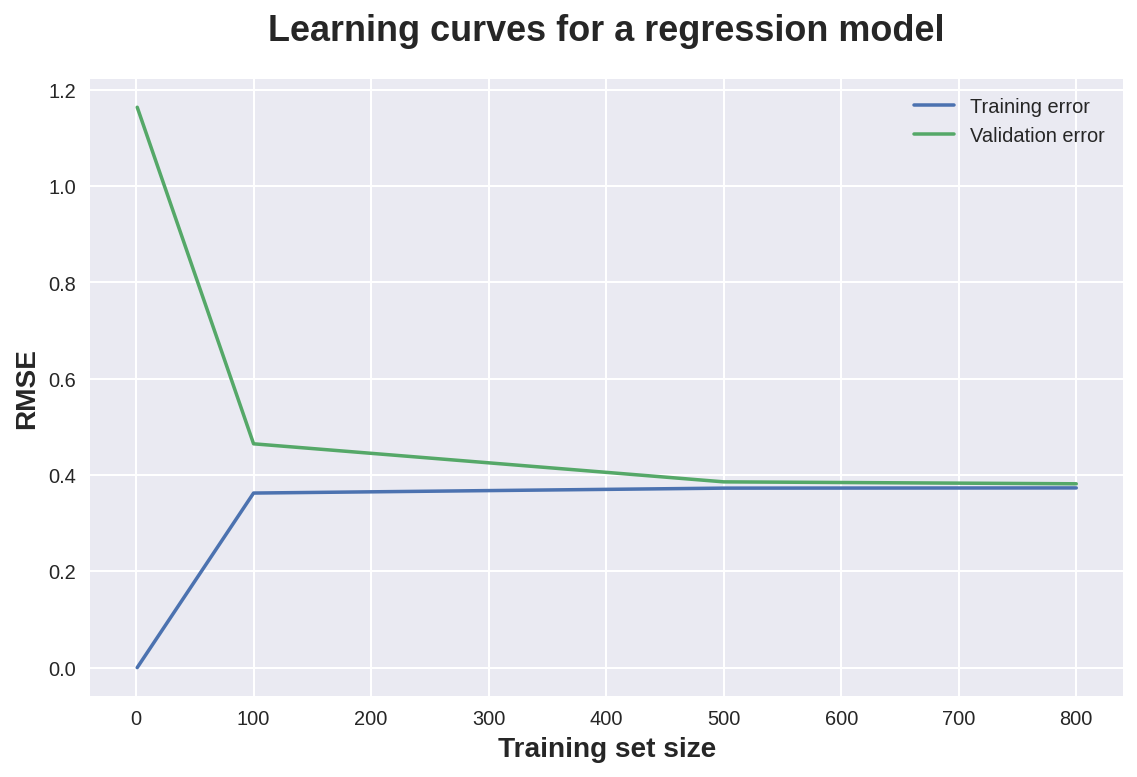

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_mean, label = 'Training error')
plt.plot(train_sizes, test_mean, label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a regression model', fontsize = 18, y = 1.03)
plt.legend()


#4. Prediction

In [ ]:
SVR_pred = SVRpipeline.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, SVR_pred))

0.34965827766128293

In [ ]:
SVR_predexp = np.expm1(SVR_pred)
y_testexp = np.expm1(y_test)

In [ ]:
np.sqrt(mean_squared_error(y_testexp, SVR_predexp))

5106.729115436511

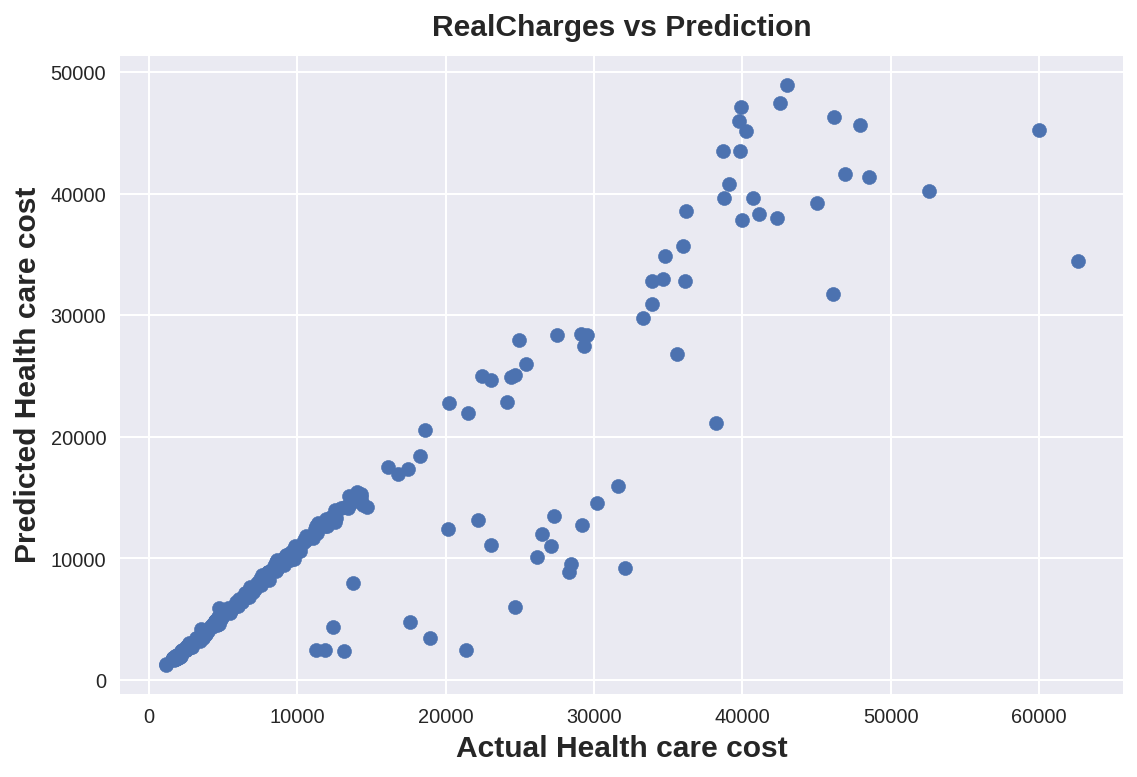

In [ ]:
fontsize = 15
plt.scatter(y_testexp, SVR_predexp)
plt.xlabel('Actual Health care cost', fontsize = fontsize)
plt.ylabel('Predicted Health care cost', fontsize = fontsize)
plt.title('RealCharges vs Prediction', fontsize = fontsize)
plt.show()

In [ ]:
RealCharges = y_testexp.reset_index(drop = True)

In [ ]:
predictionCharges = pd.DataFrame(SVR_predexp, columns = ['Prediction'])
predictionCharges['RealCharges'] = RealCharges

In [ ]:
col = ['RealCharges', 'Prediction']

In [ ]:
predictionCharges = predictionCharges[col]

In [ ]:
predictionCharges.head(10)

,RealCharges,Prediction
0,42560.43040,47468.434594
1,3206.49135,3485.641543
2,39836.51900,43527.384754
3,29523.16560,28343.834859
4,21472.47880,21941.023063
5,11365.95200,12576.739154
6,20234.85475,22793.787051
7,3180.51010,3488.035733
8,16085.12750,17531.503008
9,47928.03000,45660.875101


In [ ]:
# df2.to_csv('healthcareedited.csv', index = False )